In [23]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
%matplotlib inline

In [24]:
ol_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
diabetes_data = pd.read_csv("diabetes.csv", header=None, names=col_names)
diabetes_data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [49]:
diabetes_data = diabetes_data.iloc[1:]
diabetes_data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31,0.248,26,1


In [51]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = diabetes_data[feature_cols] # Features
y = diabetes_data.label # Target variable

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=7)

In [54]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_pred=model.predict(X_test)
y_pred

array(['1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0',
       '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0',
       '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1',
       '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0

In [56]:
X_test

,pregnant,insulin,bmi,age,glucose,bp,pedigree
238,0,0,44.1,23,179,90,0.686
716,7,392,33.9,34,187,50,0.826
767,1,0,30.1,47,126,60,0.349
499,7,145,25.1,55,195,70,0.163
64,2,128,25.4,24,141,58,0.699
...,...,...,...,...,...,...,...
191,3,0,22.6,21,111,62,0.142
353,3,0,34.4,46,61,82,0.243
123,2,100,33.6,23,107,74,0.404
111,3,135,33.3,24,171,72,0.199


In [58]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[139,  10],
       [ 36,  45]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

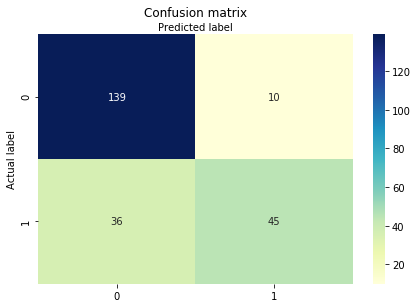

In [59]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8


In [61]:
import pickle
import os
#Saving the model
if not os.path.exists('models'):
    os.makedirs('models')
    
MODEL_PATH = "models/logistic_reg.sav"
pickle.dump(model, open(MODEL_PATH, 'wb'))

In [62]:
# initialize list of lists 
data = [[6, 0, 33.6, 50, 148, 72, 0.627]] 
df = pd.DataFrame(data, columns = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']) 
new_pred = model.predict(df)
new_pred

array(['1'], dtype=object)